<a href="https://colab.research.google.com/github/Juhyeon-creater/Sessac-project2/blob/main/JH_hundred_pose_yolo_pelvis_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트
font_path = '/content/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'NanumGothic'

MPU_Roll_Diff baseline (편향): -178.943°
다리 각도 ↔ 골반 흔들림 : 0.602


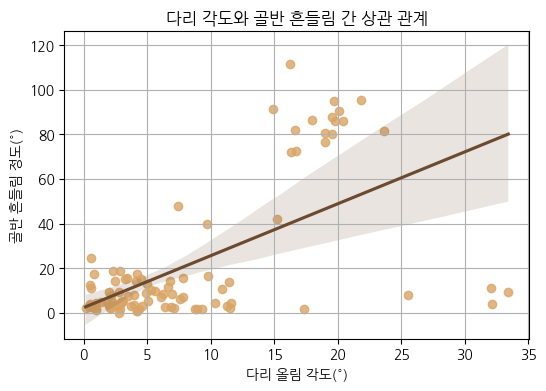

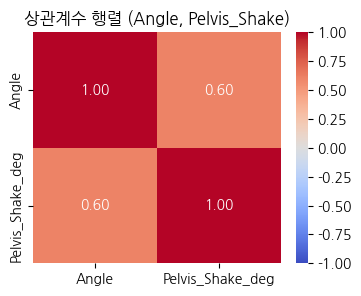

In [ ]:
# Hundred pose corr 분석 스크립트
# YOLO Angle ↔ Pelvis Roll Diff 상관계수 분석 (골반 흔들림 보정 버전)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. CSV 로드
csv_path = "/content/drive/MyDrive/shared_googledrive(Sessac Final Project)/video/머메이드/HJ_Hundred_20251120 편집.csv"
df = pd.read_csv(csv_path)

# 2. 결측치 제거 (핵심 변수만 사용)
df = df.dropna(subset=["Pelvis_Shake_Value", "Angle"])

# 3. 절댓값 적용 (다리 각도는 방향보다 크기 위주로 보기)
df["Angle"] = df["Angle"].abs()

# 3-1. 골반 Roll Diff 편향(baseline) 계산
#      - 센서를 어떻게 붙였든, 세션 전체에서 median을 기준자세로 본다
baseline = df["MPU_Roll_Diff"].median()
print(f"MPU_Roll_Diff baseline (편향): {baseline:.3f}°")

# 3-2. 편향 제거 후 '순수 흔들림 각도' 계산
#      - 기준선에서 얼마나 벗어났는지만 절댓값으로 측정
df["Pelvis_Shake_deg"] = (df["MPU_Roll_Diff"] - baseline).abs()

# 4. 상관계수 출력 (보정된 흔들림 기준)
corr_angle = df["Angle"].corr(df["Pelvis_Shake_deg"])
print(f"다리 각도 ↔ 골반 흔들림 : {corr_angle:.3f}")

# 5-1. 산점도 + 회귀선 (보정된 골반 흔들림 사용)
plt.figure(figsize=(6, 4))
sns.regplot(
    x=df["Angle"],
    y=df["Pelvis_Shake_deg"],
    scatter_kws={"color": "#D9A566"},
    line_kws={"color": "#6C4A2F"}
)
plt.title("다리 각도와 골반 흔들림 간 상관 관계")
plt.xlabel("다리 올림 각도(°)")
plt.ylabel("골반 흔들림 정도(°)")
plt.grid(True)
plt.show()

# 5-2. 상관계수 히트맵 (Angle vs 보정된 Pelvis Shake)
corr_mat = df[["Angle", "Pelvis_Shake_deg"]].corr()

plt.figure(figsize=(4, 3))
sns.heatmap(
    corr_mat,
    annot=True,
    cmap="coolwarm",
    vmin=-1, vmax=1,
    fmt=".2f"
)
plt.title("상관계수 행렬 (Angle, Pelvis_Shake)")
plt.show()
